# Run SurvTRACE on METABRIC dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os, sys
sys.path.append(os.path.abspath('../SurvTRACE'))

In [3]:
import pdb
from collections import defaultdict
import matplotlib.pyplot as plt

from survtrace.dataset import load_data
from survtrace.evaluate_utils import Evaluator
from survtrace.utils import set_random_seed
from survtrace.model import SurvTraceSingle
from survtrace.train_utils import Trainer
from survtrace.config import STConfig

# define the setup parameters
STConfig['data'] = 'metabric'

set_random_seed(STConfig['seed'])

hparams = {
    'batch_size': 64,
    'weight_decay': 1e-4,
    'learning_rate': 1e-3,
    'epochs': 20,
}

In [4]:
# load data
df, df_train, df_y_train, df_test, df_y_test, df_val, df_y_val = load_data(STConfig)

# get model
model = SurvTraceSingle(STConfig)

# initialize a trainer
trainer = Trainer(model)
train_loss, val_loss = trainer.fit((df_train, df_y_train), (df_val, df_y_val),
        batch_size=hparams['batch_size'],
        epochs=hparams['epochs'],
        learning_rate=hparams['learning_rate'],
        weight_decay=hparams['weight_decay'],)

use pytorch-cuda for training.
[Train-0]: 31.40474534034729
[Val-0]: 1.2558883428573608
[Train-1]: 24.924683809280396
[Val-1]: 1.1245657205581665
[Train-2]: 21.820661962032318
[Val-2]: 1.0441442728042603
[Train-3]: 21.50649893283844
[Val-3]: 1.0285943746566772
[Train-4]: 21.398138284683228
[Val-4]: 1.0295584201812744
EarlyStopping counter: 1 out of 5
[Train-5]: 21.221526741981506
[Val-5]: 1.0312020778656006
EarlyStopping counter: 2 out of 5
[Train-6]: 21.345574736595154
[Val-6]: 1.0420151948928833
EarlyStopping counter: 3 out of 5
[Train-7]: 21.233961820602417
[Val-7]: 1.041510820388794
EarlyStopping counter: 4 out of 5
[Train-8]: 21.23059344291687
[Val-8]: 1.0153557062149048
[Train-9]: 21.10378849506378
[Val-9]: 1.0454771518707275
EarlyStopping counter: 1 out of 5
[Train-10]: 21.15115463733673
[Val-10]: 1.0404484272003174
EarlyStopping counter: 2 out of 5
[Train-11]: 21.27986764907837
[Val-11]: 1.0320121049880981
EarlyStopping counter: 3 out of 5
[Train-12]: 21.157684087753296
[Val-12

In [5]:
# evaluate model
evaluator = Evaluator(df, df_train.index)
evaluator.eval(model, (df_test, df_y_test))
print("done")

******************************
start evaluation
******************************
C-td:  0.39127635306670594
For 0.25 quantile,
TD Concordance Index - IPCW: 0.7327496424201355
Brier Score: 0.10730246889752632
Dynamic AUC:  0.7497692257994278
For 0.5 quantile,
TD Concordance Index - IPCW: 0.7065918658842018
Brier Score: 0.17522217309279112
Dynamic AUC:  0.7321419841362232
For 0.75 quantile,
TD Concordance Index - IPCW: 0.6803957578756509
Brier Score: 0.21452020471738417
Dynamic AUC:  0.7313573689791161
done


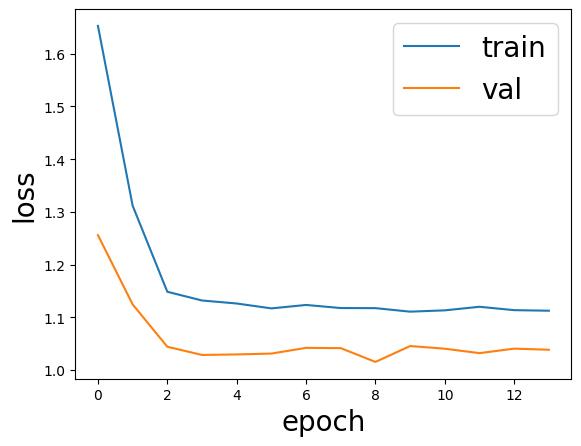

In [6]:
plt.plot(train_loss, label='train')
plt.plot(val_loss, label='val')
plt.legend(fontsize=20)
plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.show()